In [2]:
import os
import tempfile
import scanpy as sc
import seaborn as sns
import anndata as ad
import pandas as pd
import warnings 
from scipy.stats import median_abs_deviation
import numpy as np

warnings.simplefilter(action='ignore', category=Warning)


In [3]:
adata_filt_files = {}
adata_raw_files = {}

In [4]:
sample = "TREG067_ASTRL"
filt_file = os.path.join(
    "10XGenomicsRNASeq/chandraker_scRNASeq_human_PBMC_kidney_transplant_hbc04428",
    "data/CCG1155a-sc-pilot/cellranger_out/count_CCG1155_TREG067_ASTRL_A1_SC_5GEX_L_175309/outs/filtered_feature_bc_matrix")
raw_file = os.path.join(
    "10XGenomicsRNASeq/chandraker_scRNASeq_human_PBMC_kidney_transplant_hbc04428/"
    "data/CCG1155a-sc-pilot/cellranger_out/count_CCG1155_TREG067_ASTRL_A1_SC_5GEX_L_175309/outs/raw_feature_bc_matrix")
adata_filt_files[sample] = filt_file
adata_raw_files[sample] = raw_file

In [5]:
sample = "TREG067_PBMC"
filt_file = os.path.join(
    "10XGenomicsRNASeq/chandraker_scRNASeq_human_PBMC_kidney_transplant_hbc04428",
    "data/CCG1155a-sc-pilot/cellranger_out/count_CCG1155_TREG067_PBMC_A1_SC_5GEX_L_175310/outs/filtered_feature_bc_matrix")
raw_file = os.path.join(
    "10XGenomicsRNASeq/chandraker_scRNASeq_human_PBMC_kidney_transplant_hbc04428/"
    "data/CCG1155a-sc-pilot/cellranger_out/count_CCG1155_TREG067_PBMC_A1_SC_5GEX_L_175310/outs/raw_feature_bc_matrix")
adata_filt_files[sample] = filt_file
adata_raw_files[sample] = raw_file

In [6]:
for i in ["02", "72", "49", "68"]:
    for t in ["_ASTRL", "_PBMC"]:
        sample = "TREG0" + i + t
        rt_dir = "10XGenomicsRNASeq/chandraker_scRNASeq_human_PBMC_kidney_transplant_hbc04749/data/from_sequencing_facility/cellranger_out/"
        fsm = "count_" + sample + "/outs/per_sample_outs/count_" + sample + "/count/sample_filtered_feature_bc_matrix"
        rsm = "count_" + sample + "/outs/multi/count/raw_feature_bc_matrix"
        filt_file = os.path.join(rt_dir, fsm)
        raw_file = os.path.join(rt_dir, rsm)
        adata_filt_files[sample] = filt_file
        adata_raw_files[sample] = raw_file

In [7]:
for sample_name, h5_file in adata_raw_files.items():
    adata_raw_files[sample_name] = os.path.abspath(h5_file)

In [8]:
for sample_name, h5_file in adata_filt_files.items():
    adata_filt_files[sample_name] = os.path.abspath(h5_file)

In [16]:
adata_raw_files

{'TREG067_ASTRL': '/pi/alper.kucukural-umw/umw_biocore/projects/Sudipta_10x/10XGenomicsRNASeq/chandraker_scRNASeq_human_PBMC_kidney_transplant_hbc04428/data/CCG1155a-sc-pilot/cellranger_out/count_CCG1155_TREG067_ASTRL_A1_SC_5GEX_L_175309/outs/raw_feature_bc_matrix',
 'TREG067_PBMC': '/pi/alper.kucukural-umw/umw_biocore/projects/Sudipta_10x/10XGenomicsRNASeq/chandraker_scRNASeq_human_PBMC_kidney_transplant_hbc04428/data/CCG1155a-sc-pilot/cellranger_out/count_CCG1155_TREG067_PBMC_A1_SC_5GEX_L_175310/outs/raw_feature_bc_matrix',
 'TREG002_ASTRL': '/pi/alper.kucukural-umw/umw_biocore/projects/Sudipta_10x/10XGenomicsRNASeq/chandraker_scRNASeq_human_PBMC_kidney_transplant_hbc04749/data/from_sequencing_facility/cellranger_out/count_TREG002_ASTRL/outs/multi/count/raw_feature_bc_matrix',
 'TREG002_PBMC': '/pi/alper.kucukural-umw/umw_biocore/projects/Sudipta_10x/10XGenomicsRNASeq/chandraker_scRNASeq_human_PBMC_kidney_transplant_hbc04749/data/from_sequencing_facility/cellranger_out/count_TREG002_

In [9]:
adata_dict = {}

In [10]:
for sample_name, mtx_file in adata_filt_files.items():
    sample_adata = sc.read_10x_mtx(mtx_file)
    sample_adata.var_names_make_unique()
    adata_dict[sample_name] = sample_adata

In [11]:
for sample_name, adata in adata_dict.items():
    adata.obs[["sample", "patient_id", "condition"]] = [sample_name] + sample_name.split("_")
adata.obs

sample patient_id condition
AAACCTGAGCAGGTCA-1  TREG068_PBMC    TREG068      PBMC
AAACCTGAGCCACGCT-1  TREG068_PBMC    TREG068      PBMC
AAACCTGAGGTGATAT-1  TREG068_PBMC    TREG068      PBMC
AAACCTGCAAAGGTGC-1  TREG068_PBMC    TREG068      PBMC
AAACCTGCATCGGAAG-1  TREG068_PBMC    TREG068      PBMC
...                          ...        ...       ...
TTTGTCAAGTACACCT-1  TREG068_PBMC    TREG068      PBMC
TTTGTCACAGATGAGC-1  TREG068_PBMC    TREG068      PBMC
TTTGTCATCAACACCA-1  TREG068_PBMC    TREG068      PBMC
TTTGTCATCCGCAGTG-1  TREG068_PBMC    TREG068      PBMC
TTTGTCATCTGACCTC-1  TREG068_PBMC    TREG068      PBMC

[4151 rows x 3 columns]

In [12]:
for adata in adata_dict.values():
    adata.obs_names_make_unique()
    adata.var_names_make_unique()
    adata.obs["obs_index"] = adata.obs.index
    adata.obs["unique_index"] = adata.obs["sample"] + "_" + adata.obs["obs_index"]
    adata.obs.set_index("unique_index", inplace=True)
    adata.obs.index.name = None

In [13]:
adata.obs

sample patient_id condition  \
TREG068_PBMC_AAACCTGAGCAGGTCA-1  TREG068_PBMC    TREG068      PBMC   
TREG068_PBMC_AAACCTGAGCCACGCT-1  TREG068_PBMC    TREG068      PBMC   
TREG068_PBMC_AAACCTGAGGTGATAT-1  TREG068_PBMC    TREG068      PBMC   
TREG068_PBMC_AAACCTGCAAAGGTGC-1  TREG068_PBMC    TREG068      PBMC   
TREG068_PBMC_AAACCTGCATCGGAAG-1  TREG068_PBMC    TREG068      PBMC   
...                                       ...        ...       ...   
TREG068_PBMC_TTTGTCAAGTACACCT-1  TREG068_PBMC    TREG068      PBMC   
TREG068_PBMC_TTTGTCACAGATGAGC-1  TREG068_PBMC    TREG068      PBMC   
TREG068_PBMC_TTTGTCATCAACACCA-1  TREG068_PBMC    TREG068      PBMC   
TREG068_PBMC_TTTGTCATCCGCAGTG-1  TREG068_PBMC    TREG068      PBMC   
TREG068_PBMC_TTTGTCATCTGACCTC-1  TREG068_PBMC    TREG068      PBMC   

                                          obs_index  
TREG068_PBMC_AAACCTGAGCAGGTCA-1  AAACCTGAGCAGGTCA-1  
TREG068_PBMC_AAACCTGAGCCACGCT-1  AAACCTGAGCCACGCT-1  
TREG068_PBMC_AAACCTGAGGTGATAT-1  AAACCTGAGGTGATAT-1  
TREG068_PBMC_AAACCTGCAAAGGTGC-1  AAACCTGCAAAGGTGC-1  
TREG068_PBMC_AAACCTGCATCGGAAG-1  AAACCTGCATCGGAAG-1  
...                                             ...  
TREG068_PBMC_TTTGTCAAGTACACCT-1  TTTGTCAAGTACACCT-1  
TREG068_PBMC_TTTGTCACAGATGAGC-1  TTTGTCACAGATGAGC-1  
TREG068_PBMC_TTTGTCATCAACACCA-1  TTTGTCATCAACACCA-1  
TREG068_PBMC_TTTGTCATCCGCAGTG-1  TTTGTCATCCGCAGTG-1  
TREG068_PBMC_TTTGTCATCTGACCTC-1  TTTGTCATCTGACCTC-1  

[4151 rows x 4 columns]

In [15]:
for sample_name, adata in adata_dict.items():
    adata.write_h5ad("adata_files/original/" + sample_name + ".h5ad")

In [17]:
for sample_name, mtx_file in adata_raw_files.items():
    adata = sc.read_10x_mtx(mtx_file)
    adata.var_names_make_unique()
    adata.write_h5ad("adata_files/raw/" + sample_name + ".h5ad")

In [14]:
for sample_name, adata in adata_dict.items():
    # mitochondrial genes, "MT-" for human, "Mt-" for mouse
    adata.var["mt"] = adata.var_names.str.startswith(("MT-", "Mt-", "mt-"))
    # ribosomal genes
    adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL", "Rps", "Rpl"))
    # hemoglobin genes
    adata.var["hb"] = adata.var_names.str.contains("^H[Bb][^Pp]")

In [15]:
for adata in adata_dict.values():
    sc.pp.calculate_qc_metrics(adata,
                               qc_vars=["mt", "ribo", "hb"],
                               inplace=True,
                               percent_top=[20],
                               log1p=True)

In [16]:
def is_outlier(adata, metric: str, nmads: int):
    M = adata.obs[metric]
    outlier = (M < np.median(M) - nmads * median_abs_deviation(M)) | (
        np.median(M) + nmads * median_abs_deviation(M) < M
    )
    return outlier

In [17]:
adata.obs

sample patient_id condition  n_genes_by_counts  \
AAACCTGAGCAGGTCA-1  TREG068_PBMC    TREG068      PBMC                319   
AAACCTGAGCCACGCT-1  TREG068_PBMC    TREG068      PBMC               1000   
AAACCTGAGGTGATAT-1  TREG068_PBMC    TREG068      PBMC                509   
AAACCTGCAAAGGTGC-1  TREG068_PBMC    TREG068      PBMC                463   
AAACCTGCATCGGAAG-1  TREG068_PBMC    TREG068      PBMC                465   
...                          ...        ...       ...                ...   
TTTGTCAAGTACACCT-1  TREG068_PBMC    TREG068      PBMC                733   
TTTGTCACAGATGAGC-1  TREG068_PBMC    TREG068      PBMC                816   
TTTGTCATCAACACCA-1  TREG068_PBMC    TREG068      PBMC               1388   
TTTGTCATCCGCAGTG-1  TREG068_PBMC    TREG068      PBMC                496   
TTTGTCATCTGACCTC-1  TREG068_PBMC    TREG068      PBMC                440   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACCTGAGCAGGTCA-1                 5.768321         531.0            6.276643   
AAACCTGAGCCACGCT-1                 6.908755        2066.0            7.633853   
AAACCTGAGGTGATAT-1                 6.234411         719.0            6.579251   
AAACCTGCAAAGGTGC-1                 6.139885         714.0            6.572283   
AAACCTGCATCGGAAG-1                 6.144186         813.0            6.701961   
...                                     ...           ...                 ...   
TTTGTCAAGTACACCT-1                 6.598509        1384.0            7.233456   
TTTGTCACAGATGAGC-1                 6.705639        1742.0            7.463363   
TTTGTCATCAACACCA-1                 7.236339        2736.0            7.914618   
TTTGTCATCCGCAGTG-1                 6.208590         748.0            6.618739   
TTTGTCATCTGACCTC-1                 6.089045         722.0            6.583409   

                    pct_counts_in_top_20_genes  total_counts_mt  \
AAACCTGAGCAGGTCA-1                   24.858757              8.0   
AAACCTGAGCCACGCT-1                   20.619555             94.0   
AAACCTGAGGTGATAT-1                   20.027816             88.0   
AAACCTGCAAAGGTGC-1                   26.470588             75.0   
AAACCTGCATCGGAAG-1                   26.322263             74.0   
...                                        ...              ...   
TTTGTCAAGTACACCT-1                   22.760116             57.0   
TTTGTCACAGATGAGC-1                   20.264064             69.0   
TTTGTCATCAACACCA-1                   15.752924            162.0   
TTTGTCATCCGCAGTG-1                   31.550802            132.0   
TTTGTCATCTGACCTC-1                   36.011080            199.0   

                    log1p_total_counts_mt  pct_counts_mt  total_counts_ribo  \
AAACCTGAGCAGGTCA-1               2.197225       1.506591                3.0   
AAACCTGAGCCACGCT-1               4.553877       4.549855              578.0   
AAACCTGAGGTGATAT-1               4.488636      12.239222               58.0   
AAACCTGCAAAGGTGC-1               4.330733      10.504202              113.0   
AAACCTGCATCGGAAG-1               4.317488       9.102091              260.0   
...                                   ...            ...                ...   
TTTGTCAAGTACACCT-1               4.060443       4.118497              402.0   
TTTGTCACAGATGAGC-1               4.248495       3.960964              563.0   
TTTGTCATCAACACCA-1               5.093750       5.921053              413.0   
TTTGTCATCCGCAGTG-1               4.890349      17.647058               13.0   
TTTGTCATCTGACCTC-1               5.298317      27.562326               54.0   

                    log1p_total_counts_ribo  pct_counts_ribo  total_counts_hb  \
AAACCTGAGCAGGTCA-1                 1.386294         0.564972              0.0   
AAACCTGAGCCACGCT-1                 6.361302        27.976767              0.0   
AAACCTGAGGTGATAT-1                 4.077538         8.066759              0.0   
AAACCTGCAAAGGTGC-1                 4.736198        15.826331  

In [22]:
processed = sc.read("RData/4_chandraker_seurat_complete-dataset_clustered_res0-4_O2.h5ad")

In [19]:
processed

AnnData object with n_obs × n_vars = 29930 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Log10GenesPerUMI', 'mitoRatio', 'riboRatio', 'barcode', 'patient_id', 'condition', 'TCR_clones', 'TCR_proportion', 'TCR_CDR3nt', 'TCR_CDR3aa', 'TCR_v_gene', 'TCR_d_gene', 'TCR_j_gene', 'TCR_chain', 'TCR_cellranger_clonotype_id', 'TCR_clonotype_id', 'BCR_clones', 'BCR_proportion', 'BCR_CDR3nt', 'BCR_CDR3aa', 'BCR_v_gene', 'BCR_d_gene', 'BCR_j_gene', 'BCR_chain', 'BCR_cellranger_clonotype_id', 'BCR_clonotype_id', 'repseq', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'predicted.celltype.l3.score', 'predicted.celltype.l3', 'mapping.score', 'SCT_snn_res.0.2', 'SCT_snn_res.0.3', 'SCT_snn_res.0.4', 'SCT_snn_res.0.6', 'SCT_snn_res.0.8', 'seurat_clusters', 'study_clusters', 'cluster_name'
    var: 'names'
    obsm: 'X_harmony', 'X_integrated_dr', 'X_pca', 'X_ref.umap', 'X_umap'
    layers: 'counts_RNA'

In [20]:
adata.var.index.values

array(['MIR1302-2HG', 'FAM138A', 'OR4F5', ..., 'AC007325.1', 'AC007325.4',
       'AC007325.2'], shape=(36601,), dtype=object)

In [21]:
for adata in adata_dict.values():
    adata.obs_names_make_unique()
    adata.var_names_make_unique()
    adata.obs["obs_index"] = adata.obs.index
    adata.obs["unique_index"] = adata.obs["sample"] + "_" + adata.obs["obs_index"]
    adata.obs.set_index("unique_index", inplace=True)
    adata.obs.index.name = None

In [147]:
adata_ori.shape

(43759, 36601)

In [22]:
processed.obs.reset_index(drop=False)

index     orig.ident  nCount_RNA  \
0      TREG002_ASTRL_AAACCTGAGAGTGACC-1  TREG002_ASTRL      2147.0   
1      TREG002_ASTRL_AAACCTGTCGCCTGAG-1  TREG002_ASTRL      1447.0   
2      TREG002_ASTRL_AAACGGGAGATCGGGT-1  TREG002_ASTRL      4499.0   
3      TREG002_ASTRL_AAACGGGCATCTGGTA-1  TREG002_ASTRL      8228.0   
4      TREG002_ASTRL_AAACGGGGTCGAACAG-1  TREG002_ASTRL      3077.0   
...                                 ...            ...         ...   
29925   TREG067_PBMC_TTTGTCAAGGGATCTG-1   TREG067_PBMC      2953.0   
29926   TREG067_PBMC_TTTGTCAGTCTCCCTA-1   TREG067_PBMC      3747.0   
29927   TREG067_PBMC_TTTGTCAGTGAAAGAG-1   TREG067_PBMC      3065.0   
29928   TREG067_PBMC_TTTGTCAGTGCCTTGG-1   TREG067_PBMC      4142.0   
29929   TREG067_PBMC_TTTGTCATCCCAAGTA-1   TREG067_PBMC      3227.0   

       nFeature_RNA  Log10GenesPerUMI  mitoRatio  riboRatio  \
0              1180          0.921980   0.037727   0.094551   
1               938          0.940431   0.080166   0.022806   
2              1740          0.887064   0.033118   0.139587   
3              2891          0.883982   0.074988   0.091031   
4              1426          0.904244   0.038674   0.105622   
...             ...               ...        ...        ...   
29925          1187          0.885942   0.019302   0.200474   
29926          1404          0.880707   0.060315   0.191353   
29927          1248          0.888076   0.012724   0.193801   
29928          1623          0.887512   0.023419   0.194592   
29929          1250          0.882613   0.024481   0.217849   

                                barcode patient_id condition  ...  \
0      TREG002_ASTRL_AAACCTGAGAGTGACC-1    TREG002     ASTRL  ...   
1      TREG002_ASTRL_AAACCTGTCGCCTGAG-1    TREG002     ASTRL  ...   
2      TREG002_ASTRL_AAACGGGAGATCGGGT-1    TREG002     ASTRL  ...   
3      TREG002_ASTRL_AAACGGGCATCTGGTA-1    TREG002     ASTRL  ...   
4      TREG002_ASTRL_AAACGGGGTCGAACAG-1    TREG002     ASTRL  ...   
...                                 ...        ...       ...  ...   
29925   TREG067_PBMC_TTTGTCAAGGGATCTG-1    TREG067      PBMC  ...   
29926   TREG067_PBMC_TTTGTCAGTCTCCCTA-1    TREG067      PBMC  ...   
29927   TREG067_PBMC_TTTGTCAGTGAAAGAG-1    TREG067      PBMC  ...   
29928   TREG067_PBMC_TTTGTCAGTGCCTTGG-1    TREG067      PBMC  ...   
29929   TREG067_PBMC_TTTGTCATCCCAAGTA-1    TREG067      PBMC  ...   

       predicted.celltype.l3  mapping.score SCT_snn_res.0.2 SCT_snn_res.0.3  \
0                       NK_1       0.620900               1               2   
1                  CD4 TCM_2       0.173453               3               3   
2                  CD4 TCM_2       0.510923               0               0   
3           NK Proliferating       0.940550               6               6   
4                       NK_2       0.435495               1               2   
...                      ...            ...             ...             ...   
29925              CD4 TCM_1       0.426965               0               0   
29926                   MAIT       0.601932               0              10   
29927          NK_CD56bright       0.851027               1               2   
29928              CD4 TCM_1       0.578768               0               0   
29929                   MAIT       0.952558               0              10   

      SCT_snn_res.0.4 SCT_snn_res.0.6 SCT_snn_res.0.8 seurat_clusters  \
0                   2               2               3               3   
1                   5               5               6               6   
2                   0               0               0               0   
3                   6               7               7               7   
4                   2               2               3               3   
...               ...             ...             ...             ...   
29925               0               0               0               0   
29926              12              14              12              12   
2

In [23]:
adata.obs

sample patient_id condition  \
TREG068_PBMC_AAACCTGAGCAGGTCA-1  TREG068_PBMC    TREG068      PBMC   
TREG068_PBMC_AAACCTGAGCCACGCT-1  TREG068_PBMC    TREG068      PBMC   
TREG068_PBMC_AAACCTGAGGTGATAT-1  TREG068_PBMC    TREG068      PBMC   
TREG068_PBMC_AAACCTGCAAAGGTGC-1  TREG068_PBMC    TREG068      PBMC   
TREG068_PBMC_AAACCTGCATCGGAAG-1  TREG068_PBMC    TREG068      PBMC   
...                                       ...        ...       ...   
TREG068_PBMC_TTTGTCAAGTACACCT-1  TREG068_PBMC    TREG068      PBMC   
TREG068_PBMC_TTTGTCACAGATGAGC-1  TREG068_PBMC    TREG068      PBMC   
TREG068_PBMC_TTTGTCATCAACACCA-1  TREG068_PBMC    TREG068      PBMC   
TREG068_PBMC_TTTGTCATCCGCAGTG-1  TREG068_PBMC    TREG068      PBMC   
TREG068_PBMC_TTTGTCATCTGACCTC-1  TREG068_PBMC    TREG068      PBMC   

                                 n_genes_by_counts  log1p_n_genes_by_counts  \
TREG068_PBMC_AAACCTGAGCAGGTCA-1                319                 5.768321   
TREG068_PBMC_AAACCTGAGCCACGCT-1               1000                 6.908755   
TREG068_PBMC_AAACCTGAGGTGATAT-1                509                 6.234411   
TREG068_PBMC_AAACCTGCAAAGGTGC-1                463                 6.139885   
TREG068_PBMC_AAACCTGCATCGGAAG-1                465                 6.144186   
...                                            ...                      ...   
TREG068_PBMC_TTTGTCAAGTACACCT-1                733                 6.598509   
TREG068_PBMC_TTTGTCACAGATGAGC-1                816                 6.705639   
TREG068_PBMC_TTTGTCATCAACACCA-1               1388                 7.236339   
TREG068_PBMC_TTTGTCATCCGCAGTG-1                496                 6.208590   
TREG068_PBMC_TTTGTCATCTGACCTC-1                440                 6.089045   

                                 total_counts  log1p_total_counts  \
TREG068_PBMC_AAACCTGAGCAGGTCA-1         531.0            6.276643   
TREG068_PBMC_AAACCTGAGCCACGCT-1        2066.0            7.633853   
TREG068_PBMC_AAACCTGAGGTGATAT-1         719.0            6.579251   
TREG068_PBMC_AAACCTGCAAAGGTGC-1         714.0            6.572283   
TREG068_PBMC_AAACCTGCATCGGAAG-1         813.0            6.701961   
...                                       ...                 ...   
TREG068_PBMC_TTTGTCAAGTACACCT-1        1384.0            7.233456   
TREG068_PBMC_TTTGTCACAGATGAGC-1        1742.0            7.463363   
TREG068_PBMC_TTTGTCATCAACACCA-1        2736.0            7.914618   
TREG068_PBMC_TTTGTCATCCGCAGTG-1         748.0            6.618739   
TREG068_PBMC_TTTGTCATCTGACCTC-1         722.0            6.583409   

                                 pct_counts_in_top_20_genes  total_counts_mt  \
TREG068_PBMC_AAACCTGAGCAGGTCA-1                   24.858757              8.0   
TREG068_PBMC_AAACCTGAGCCACGCT-1                   20.619555             94.0   
TREG068_PBMC_AAACCTGAGGTGATAT-1                   20.027816             88.0   
TREG068_PBMC_AAACCTGCAAAGGTGC-1                   26.470588             75.0   
TREG068_PBMC_AAACCTGCATCGGAAG-1                   26.322263             74.0   
...                                                     ...              ...   
TREG068_PBMC_TTTGTCAAGTACACCT-1                   22.760116             57.0   
TREG068_PBMC_TTTGTCACAGATGAGC-1                   20.264064             69.0   
TREG068_PBMC_TTTGTCATCAACACCA-1                   15.752924            162.0   
TREG068_PBMC_TTTGTCATCCGCAGTG-1                   31.550802            132.0   
TREG068_PBMC_TTTGTCATCTGACCTC-1                   36.011080            199.0   

                                 log1p_total_counts_mt  pct_counts_mt  \
TREG068_PBMC_AAACCTGAGCAGGTCA-1               2.197225       1.506591   
TREG068_PBMC_AAACCTGAGCCACGCT-1               4.553877       4.549855   
TREG068_PBMC_AAACCTGAGGTGATAT-1               4.488636      12.239222   
TREG068_PBMC_AAACCTGCAAAGGTGC-1               4.330733      10.504202   
TREG068_PBMC_AAACCTGCATCGGAAG-1               4.317488       9.102091   
...                  

In [24]:
combined = ad.concat(adata_dict)
combined

AnnData object with n_obs × n_vars = 43759 × 36601
    obs: 'sample', 'patient_id', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'obs_index'

In [25]:
combined.var["names"] = combined.var.index

In [26]:
processed

AnnData object with n_obs × n_vars = 29930 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Log10GenesPerUMI', 'mitoRatio', 'riboRatio', 'barcode', 'patient_id', 'condition', 'TCR_clones', 'TCR_proportion', 'TCR_CDR3nt', 'TCR_CDR3aa', 'TCR_v_gene', 'TCR_d_gene', 'TCR_j_gene', 'TCR_chain', 'TCR_cellranger_clonotype_id', 'TCR_clonotype_id', 'BCR_clones', 'BCR_proportion', 'BCR_CDR3nt', 'BCR_CDR3aa', 'BCR_v_gene', 'BCR_d_gene', 'BCR_j_gene', 'BCR_chain', 'BCR_cellranger_clonotype_id', 'BCR_clonotype_id', 'repseq', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'predicted.celltype.l3.score', 'predicted.celltype.l3', 'mapping.score', 'SCT_snn_res.0.2', 'SCT_snn_res.0.3', 'SCT_snn_res.0.4', 'SCT_snn_res.0.6', 'SCT_snn_res.0.8', 'seurat_clusters', 'study_clusters', 'cluster_name'
    var: 'names'
    obsm: 'X_harmony', 'X_integrated_dr', 'X_pca', 'X_ref.umap', 'X_umap'
    layers: 'counts_RNA'

In [27]:
len(set(processed.obs.index).intersection(combined.obs.index))

29930

In [28]:
len(set(combined.var["names"]).intersection(processed.var["names"]))

36591

In [29]:
set(combined.var["names"]).difference(processed.var["names"])

{'ARMCX5-GPRASP2-1',
 'CYB561D2-1',
 'GGT1-1',
 'GOLGA8M-1',
 'HSPA14-1',
 'LINC01238-1',
 'LINC01505-1',
 'MATR3-1',
 'TBCE-1',
 'TMSB15B-1'}

In [30]:
set(processed.var["names"]).difference(combined.var["names"])

{'ARMCX5-GPRASP2.1',
 'CYB561D2.1',
 'GGT1.1',
 'GOLGA8M.1',
 'HSPA14.1',
 'LINC01238.1',
 'LINC01505.1',
 'MATR3.1',
 'TBCE.1',
 'TMSB15B.1'}

In [31]:
for n in set(combined.var["names"]).difference(processed.var["names"]):
    rn = n[:-2] + ".1"
    combined.var["names"] = combined.var["names"].replace({n: rn})

In [32]:
set(processed.var["names"]).difference(combined.var["names"])

set()

In [33]:
set(combined.var["names"]).difference(processed.var["names"])

set()

In [34]:
combined.var.index = combined.var["names"]
combined.var.index.name = None

In [35]:
combined

AnnData object with n_obs × n_vars = 43759 × 36601
    obs: 'sample', 'patient_id', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'obs_index'
    var: 'names'

In [36]:
combined_filtered = combined[combined.obs.index.isin(processed.obs.index)]

In [37]:
combined_filtered.obs

sample patient_id condition  \
TREG067_ASTRL_AAACCTGAGCACCGTC-1  TREG067_ASTRL    TREG067     ASTRL   
TREG067_ASTRL_AAACCTGAGCCACTAT-1  TREG067_ASTRL    TREG067     ASTRL   
TREG067_ASTRL_AAACCTGAGTCGAGTG-1  TREG067_ASTRL    TREG067     ASTRL   
TREG067_ASTRL_AAACCTGCATTTCAGG-1  TREG067_ASTRL    TREG067     ASTRL   
TREG067_ASTRL_AAACCTGGTAGGCTGA-1  TREG067_ASTRL    TREG067     ASTRL   
...                                         ...        ...       ...   
TREG068_PBMC_TTTGGTTTCTAACGGT-1    TREG068_PBMC    TREG068      PBMC   
TREG068_PBMC_TTTGTCAAGCCACCTG-1    TREG068_PBMC    TREG068      PBMC   
TREG068_PBMC_TTTGTCAAGTACACCT-1    TREG068_PBMC    TREG068      PBMC   
TREG068_PBMC_TTTGTCACAGATGAGC-1    TREG068_PBMC    TREG068      PBMC   
TREG068_PBMC_TTTGTCATCAACACCA-1    TREG068_PBMC    TREG068      PBMC   

                                  n_genes_by_counts  log1p_n_genes_by_counts  \
TREG067_ASTRL_AAACCTGAGCACCGTC-1               2644                 7.880426   
TREG067_ASTRL_AAACCTGAGCCACTAT-1               1368                 7.221836   
TREG067_ASTRL_AAACCTGAGTCGAGTG-1               2712                 7.905810   
TREG067_ASTRL_AAACCTGCATTTCAGG-1               1865                 7.531552   
TREG067_ASTRL_AAACCTGGTAGGCTGA-1               1569                 7.358831   
...                                             ...                      ...   
TREG068_PBMC_TTTGGTTTCTAACGGT-1                1005                 6.913737   
TREG068_PBMC_TTTGTCAAGCCACCTG-1                 914                 6.818924   
TREG068_PBMC_TTTGTCAAGTACACCT-1                 733                 6.598509   
TREG068_PBMC_TTTGTCACAGATGAGC-1                 816                 6.705639   
TREG068_PBMC_TTTGTCATCAACACCA-1                1388                 7.236339   

                                  total_counts  log1p_total_counts  \
TREG067_ASTRL_AAACCTGAGCACCGTC-1        8023.0            8.990192   
TREG067_ASTRL_AAACCTGAGCCACTAT-1        2960.0            7.993282   
TREG067_ASTRL_AAACCTGAGTCGAGTG-1        7928.0            8.978282   
TREG067_ASTRL_AAACCTGCATTTCAGG-1        4869.0            8.490849   
TREG067_ASTRL_AAACCTGGTAGGCTGA-1        3616.0            8.193400   
...                                        ...                 ...   
TREG068_PBMC_TTTGGTTTCTAACGGT-1         2309.0            7.745003   
TREG068_PBMC_TTTGTCAAGCCACCTG-1         2355.0            7.764720   
TREG068_PBMC_TTTGTCAAGTACACCT-1         1384.0            7.233456   
TREG068_PBMC_TTTGTCACAGATGAGC-1         1742.0            7.463363   
TREG068_PBMC_TTTGTCATCAACACCA-1         2736.0            7.914618   

                                  pct_counts_in_top_20_genes  total_counts_mt  \
TREG067_ASTRL_AAACCTGAGCACCGTC-1                   18.023183            196.0   
TREG067_ASTRL_AAACCTGAGCCACTAT-1                   19.966216            219.0   
TREG067_ASTRL_AAACCTGAGTCGAGTG-1                   19.614026            419.0   
TREG067_ASTRL_AAACCTGCATTTCAGG-1                   25.672623            785.0   
TREG067_ASTRL_AAACCTGGTAGGCTGA-1                   20.962389            121.0   
...                                                      ...              ...   
TREG068_PBMC_TTTGGTTTCTAACGGT-1                    21.264617            122.0   
TREG068_PBMC_TTTGTCAAGCCACCTG-1                    23.227176             86.0   
TREG068_PBMC_TTTGTCAAGTACACCT-1                    22.760116             57.0   
TREG068_PBMC_TTTGTCACAGATGAGC-1                    20.264064             69.0   
TREG068_PBMC_TTTGTCATCAACACCA-1                    15.752924            162.0   

                                  log1p_total_counts_mt  pct_counts_mt  \
TREG067_ASTRL_AAACCTGAGCACCGTC-1               5.283204       2.442976   
TREG067_ASTRL_AAACCTGAGCCACTAT-1               5.393628       7.398649   
TREG067_ASTRL_AAACCTGAGTCGAGTG-1               6.040255       5.285066   
TREG067_ASTRL_AAACCTGCATTTCAGG-1               6.666957      16.122406   
TREG067_ASTRL_AAACCTGGTAGGCTGA-

In [38]:
groups = combined_filtered.obs.groupby("sample").indices

In [39]:
groups

{'TREG002_ASTRL': array([ 8810,  8811,  8812, ..., 10401, 10402, 10403], shape=(1594,)),
 'TREG002_PBMC': array([10404, 10405, 10406, ..., 12569, 12570, 12571], shape=(2168,)),
 'TREG049_ASTRL': array([18789, 18790, 18791, ..., 21047, 21048, 21049], shape=(2261,)),
 'TREG049_PBMC': array([21050, 21051, 21052, ..., 24555, 24556, 24557], shape=(3508,)),
 'TREG067_ASTRL': array([   0,    1,    2, ..., 3743, 3744, 3745], shape=(3746,)),
 'TREG067_PBMC': array([3746, 3747, 3748, ..., 8807, 8808, 8809], shape=(5064,)),
 'TREG068_ASTRL': array([24558, 24559, 24560, ..., 28162, 28163, 28164], shape=(3607,)),
 'TREG068_PBMC': array([28165, 28166, 28167, ..., 29927, 29928, 29929], shape=(1765,)),
 'TREG072_ASTRL': array([12572, 12573, 12574, ..., 16660, 16661, 16662], shape=(4091,)),
 'TREG072_PBMC': array([16663, 16664, 16665, ..., 18786, 18787, 18788], shape=(2126,))}

In [40]:
adatas_filtered = {}
for sample_name, inds in groups.items():
    adatas_filtered[sample_name] = combined_filtered[inds]

In [13]:
import logging

import anndata2ri
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

rcb.logger.setLevel(logging.ERROR)
#ro.pandas2ri.activate()
#anndata2ri.activate()

%load_ext rpy2.ipython

In [14]:
%load_ext rpy2.ipython
anndata2ri.set_ipython_converter()

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [15]:
%%R
library(SoupX)


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

In [16]:
for sam, adt in adatas_filtered.items():
    print(sam)
    adata_pp = adt.copy()
    sc.pp.normalize_per_cell(adata_pp)
    sc.pp.log1p(adata_pp)
    sc.pp.pca(adata_pp)
    sc.pp.neighbors(adata_pp)
    sc.tl.leiden(adata_pp, key_added="soupx_groups")
    soupx_groups = adata_pp.obs["soupx_groups"]
    del adata_pp
    
    cells = adt.obs_names
    genes = adt.var_names
    data = adt.X.T
    
    # load raw data
    adt_raw = sc.read_10x_mtx(adata_raw_files[sam])
    adt_raw.var_names_make_unique()
    data_tod = adt_raw.X.T
    del adt_raw

    #### R parts start #####
    ########################
    %R -i data -i data_tod -i genes -i cells -i soupx_groups 
    
    # specify row and column names of data
    %R rownames(data) = genes
    %R colnames(data) = cells
    %R rownames(data_tod) = genes

    # ensure correct sparse format for table of counts and table of droplets
    %R data <- as(data, "sparseMatrix")
    %R data_tod <- as(data_tod, "sparseMatrix")

    # Generate SoupChannel Object for SoupX 
    %R sc = SoupChannel(data_tod, data)
    
    # Set cluster information in SoupChannel
    %R sc = setClusters(sc, soupx_groups)
    
    # Estimate contamination fraction
    %R sc  = autoEstCont(sc, doPlot=FALSE)
    
    
    # Infer corrected table of counts and rount to integer
    %R -o out out = adjustCounts(sc, roundToInt = TRUE)
    
    #### R parts end #####
    ########################
    
    adt.layers["counts"] = adt.X
    adt.layers["soupX_counts"] = out.T
    adt.X = adt.layers["soupX_counts"]
    adt.obs["soupX_contamination"] = (
        (adt.layers["counts"].sum(axis=1) - adt.layers["soupX_counts"].sum(axis=1)
        ) / adt.layers["counts"].sum(axis=1))
                                                      

TREG002_ASTRL


490 genes passed tf-idf cut-off and 296 soup quantile filter.  Taking the top 100.
Using 671 independent estimates of rho.
Estimated global rho of 0.01


Expanding counts from 9 clusters to 1594 cells.
In addition: Warning message:
In sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w],  :
  'giveCsparse' is deprecated; setting repr="T" for you


TREG002_PBMC


KeyboardInterrupt: 

In [17]:
adatas_filtered = {}
for h5_file in os.scandir("adata_files"):
    if h5_file.name.endswith("_soupX.h5ad"):
        sam = h5_file.name.split("_soupX")[0]
        adatas_filtered[sam] = ad.read_h5ad(h5_file)

In [10]:
adatas_filtered

{'TREG002_ASTRL': AnnData object with n_obs × n_vars = 1594 × 36601
     obs: 'sample', 'patient_id', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'obs_index', 'soupX_contamination'
     var: 'names'
     layers: 'counts', 'soupX_counts',
 'TREG002_PBMC': AnnData object with n_obs × n_vars = 2168 × 36601
     obs: 'sample', 'patient_id', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'obs_index', 'soupX_contamination'
     var: 'names'
     layers: 'co

In [18]:
for sam, adt in adatas_filtered.items():
    print(sam)
    adata_pp = adt.copy()
    sc.pp.normalize_per_cell(adata_pp)
    sc.pp.log1p(adata_pp)
    sc.pp.pca(adata_pp)
    sc.pp.neighbors(adata_pp)
    sc.tl.leiden(adata_pp, key_added="soupx_groups")
    soupx_groups = adata_pp.obs["soupx_groups"]
    del adata_pp
    
    cells = adt.obs_names
    genes = adt.var_names
    data = adt.X.T
    
    # load raw data
    adt_raw = sc.read_10x_mtx(adata_raw_files[sam])
    adt_raw.var_names_make_unique()
    data_tod = adt_raw.X.T
    del adt_raw

    #### R parts start #####
    ########################
    %R -i data -i data_tod -i genes -i cells -i soupx_groups 
    
    # specify row and column names of data
    %R rownames(data) = genes
    %R colnames(data) = cells
    %R rownames(data_tod) = genes

    # ensure correct sparse format for table of counts and table of droplets
    %R data <- as(data, "sparseMatrix")
    %R data_tod <- as(data_tod, "sparseMatrix")

    # Generate SoupChannel Object for SoupX 
    %R sc = SoupChannel(data_tod, data)
    
    # Set cluster information in SoupChannel
    %R sc = setClusters(sc, soupx_groups)
    
    # Estimate contamination fraction
    %R sc  = setContaminationFraction(sc, 0.2)
    # 
    
    
    # Infer corrected table of counts and round to integer
    %R -o out out = adjustCounts(sc, roundToInt = TRUE)

    # Infer corrected table of counts and round to integer
    %R -o sprof sprof = sc$soupProfile
    
    #### R parts end #####
    ########################
    
    # adt.layers["counts"] = adt.X
    adt.layers["soupX_counts_02"] = out.T
    adt.obs["soupX_contamination_02"] = (
        (adt.layers["counts"].sum(axis=1) - adt.layers["soupX_counts_02"].sum(axis=1)
        ) / adt.layers["counts"].sum(axis=1))
                                                      

TREG002_ASTRL


Expanding counts from 9 clusters to 1594 cells.
In addition: Warning message:
In sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w],  :
  'giveCsparse' is deprecated; setting repr="T" for you


TREG002_PBMC


Expanding counts from 12 clusters to 2168 cells.
In addition: Warning message:
In sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w],  :
  'giveCsparse' is deprecated; setting repr="T" for you


TREG049_ASTRL


Expanding counts from 13 clusters to 2261 cells.
In addition: Warning message:
In sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w],  :
  'giveCsparse' is deprecated; setting repr="T" for you


TREG049_PBMC


Expanding counts from 11 clusters to 3508 cells.
In addition: Warning message:
In sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w],  :
  'giveCsparse' is deprecated; setting repr="T" for you


TREG067_ASTRL


Expanding counts from 13 clusters to 3746 cells.
In addition: Warning message:
In sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w],  :
  'giveCsparse' is deprecated; setting repr="T" for you


TREG067_PBMC


Expanding counts from 15 clusters to 5064 cells.
In addition: Warning message:
In sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w],  :
  'giveCsparse' is deprecated; setting repr="T" for you


TREG068_ASTRL


Expanding counts from 12 clusters to 3607 cells.
In addition: Warning message:
In sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w],  :
  'giveCsparse' is deprecated; setting repr="T" for you


TREG068_PBMC


Expanding counts from 9 clusters to 1765 cells.
In addition: Warning message:
In sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w],  :
  'giveCsparse' is deprecated; setting repr="T" for you


TREG072_ASTRL


Expanding counts from 14 clusters to 4091 cells.
In addition: Warning message:
In sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w],  :
  'giveCsparse' is deprecated; setting repr="T" for you


TREG072_PBMC


Expanding counts from 13 clusters to 2126 cells.
In addition: Warning message:
In sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w],  :
  'giveCsparse' is deprecated; setting repr="T" for you


In [19]:
for sam, adt in adatas_filtered.items():
    h5_file = os.path.join("adata_files", sam + "_soupX.h5ad")
    adt.write(h5_file)

In [44]:
soup_profiles = {}

In [45]:
for sam, adt in adatas_filtered.items():
    print(sam)
    adata_pp = adt.copy()
    sc.pp.normalize_per_cell(adata_pp)
    sc.pp.log1p(adata_pp)
    sc.pp.pca(adata_pp)
    sc.pp.neighbors(adata_pp)
    sc.tl.leiden(adata_pp, key_added="soupx_groups")
    soupx_groups = adata_pp.obs["soupx_groups"]
    del adata_pp
    
    cells = adt.obs_names
    genes = adt.var_names
    data = adt.X.T
    
    # load raw data
    adt_raw = sc.read_10x_mtx(adata_raw_files[sam])
    adt_raw.var_names_make_unique()
    data_tod = adt_raw.X.T
    del adt_raw

    #### R parts start #####
    ########################
    %R -i data -i data_tod -i genes -i cells -i soupx_groups 
    
    # specify row and column names of data
    %R rownames(data) = genes
    %R colnames(data) = cells
    %R rownames(data_tod) = genes

    # ensure correct sparse format for table of counts and table of droplets
    %R data <- as(data, "sparseMatrix")
    %R data_tod <- as(data_tod, "sparseMatrix")

    # Generate SoupChannel Object for SoupX 
    %R sc = SoupChannel(data_tod, data)
    
    # Set cluster information in SoupChannel
    %R sc = setClusters(sc, soupx_groups)
    
    # Estimate contamination fraction
    %R sc  = setContaminationFraction(sc, 0.2)
    # 
    
    
    # Infer corrected table of counts and round to integer
    %R -o out out = adjustCounts(sc, roundToInt = TRUE)

    # Infer corrected table of counts and round to integer
    %R -o sprof sprof = sc$soupProfile
    
    #### R parts end #####
    ########################
    sprof = pd.DataFrame.from_records(sprof)
    sprof.index = adt.var_names
    soup_profiles[sam] = sprof
    
                                                      

TREG002_ASTRL


Expanding counts from 9 clusters to 1594 cells.
In addition: Warning message:
In sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w],  :
  'giveCsparse' is deprecated; setting repr="T" for you


TREG002_PBMC


Expanding counts from 12 clusters to 2168 cells.
In addition: Warning message:
In sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w],  :
  'giveCsparse' is deprecated; setting repr="T" for you


TREG049_ASTRL


Expanding counts from 13 clusters to 2261 cells.
In addition: Warning message:
In sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w],  :
  'giveCsparse' is deprecated; setting repr="T" for you


TREG049_PBMC


Expanding counts from 11 clusters to 3508 cells.
In addition: Warning message:
In sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w],  :
  'giveCsparse' is deprecated; setting repr="T" for you


TREG067_ASTRL


Expanding counts from 13 clusters to 3746 cells.
In addition: Warning message:
In sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w],  :
  'giveCsparse' is deprecated; setting repr="T" for you


TREG067_PBMC


Expanding counts from 15 clusters to 5064 cells.
In addition: Warning message:
In sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w],  :
  'giveCsparse' is deprecated; setting repr="T" for you


TREG068_ASTRL


Expanding counts from 12 clusters to 3607 cells.
In addition: Warning message:
In sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w],  :
  'giveCsparse' is deprecated; setting repr="T" for you


TREG068_PBMC


Expanding counts from 9 clusters to 1765 cells.
In addition: Warning message:
In sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w],  :
  'giveCsparse' is deprecated; setting repr="T" for you


TREG072_ASTRL


Expanding counts from 14 clusters to 4091 cells.
In addition: Warning message:
In sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w],  :
  'giveCsparse' is deprecated; setting repr="T" for you


TREG072_PBMC


Expanding counts from 13 clusters to 2126 cells.
In addition: Warning message:
In sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w],  :
  'giveCsparse' is deprecated; setting repr="T" for you


In [49]:
soup_profiles = pd.concat(soup_profiles).reset_index()
soup_profiles

level_0      level_1           est  counts
0       TREG002_ASTRL  MIR1302-2HG  0.000000e+00     0.0
1       TREG002_ASTRL      FAM138A  0.000000e+00     0.0
2       TREG002_ASTRL        OR4F5  0.000000e+00     0.0
3       TREG002_ASTRL   AL627309.1  0.000000e+00     0.0
4       TREG002_ASTRL   AL627309.3  0.000000e+00     0.0
...               ...          ...           ...     ...
366005   TREG072_PBMC   AC141272.1  6.432875e-07     2.0
366006   TREG072_PBMC   AC023491.2  0.000000e+00     0.0
366007   TREG072_PBMC   AC007325.1  0.000000e+00     0.0
366008   TREG072_PBMC   AC007325.4  3.216437e-07     1.0
366009   TREG072_PBMC   AC007325.2  0.000000e+00     0.0

[366010 rows x 4 columns]

In [50]:
soup_profiles.rename(columns={"level_0": "sample", "level_1": "gene"},
                     inplace=True)
soup_profiles.sort_values("est").iloc[-50:]

sample      gene       est    counts
36561   TREG002_ASTRL    MT-CO1  0.012215    3544.0
73161    TREG002_PBMC    MT-ND2  0.012307   12159.0
354947   TREG072_PBMC       B2M  0.012440   38675.0
166407  TREG067_ASTRL    MALAT1  0.012464   26935.0
73166    TREG002_PBMC    MT-CO3  0.012662   12509.0
145181   TREG049_PBMC    TMSB4X  0.012873    5900.0
318346  TREG072_ASTRL       B2M  0.013167   35419.0
208543   TREG067_PBMC       B2M  0.013280   13019.0
182965  TREG067_ASTRL    MT-CO1  0.013450   29064.0
245509  TREG068_ASTRL     RPLP1  0.013531   55894.0
254984  TREG068_ASTRL    TMSB4X  0.013621   56266.0
146367   TREG049_PBMC   MT-ATP6  0.014134    6478.0
181782  TREG067_ASTRL    TMSB4X  0.014223   30734.0
219576   TREG067_PBMC    MT-CYB  0.014356   14074.0
146362   TREG049_PBMC    MT-ND1  0.014376    6589.0
25538   TREG002_ASTRL       B2M  0.014631    4245.0
219564   TREG067_PBMC    MT-ND1  0.014679   14391.0
305919  TREG072_ASTRL      ACTB  0.015327   41228.0
84003   TREG049_ASTRL      CD74  0.015452   16885.0
292772   TREG068_PBMC    MT-CO3  0.015902   23712.0
203008   TREG067_PBMC    MALAT1  0.016196   15878.0
146368   TREG049_PBMC    MT-CO3  0.016598    7607.0
128910   TREG049_PBMC       HBB  0.016757    7680.0
73163    TREG002_PBMC    MT-CO2  0.017118   16911.0
135341   TREG049_PBMC       B2M  0.017132    7852.0
171942  TREG067_ASTRL       B2M  0.017387   37573.0
219569   TREG067_PBMC   MT-ATP6  0.017863   17512.0
281745   TREG068_PBMC       B2M  0.018445   27504.0
292767   TREG068_PBMC    MT-ND2  0.018544   27652.0
291585   TREG068_PBMC    TMSB4X  0.019329   28823.0
292769   TREG068_PBMC    MT-CO2  0.019591   29213.0
349254   TREG072_PBMC      FTH1  0.019885   61822.0
146363   TREG049_PBMC    MT-ND2  0.020281    9295.0
98740   TREG049_ASTRL       B2M  0.020565   22473.0
146365   TREG049_PBMC    MT-CO2  0.021164    9700.0
312653  TREG072_ASTRL      FTH1  0.022104   59459.0
276210   TREG068_PBMC    MALAT1  0.022378   33369.0
292768   TREG068_PBMC    MT-CO1  0.022536   33605.0
73162    TREG002_PBMC    MT-CO1  0.023043   22765.0
146364   TREG049_PBMC    MT-CO1  0.023628   10829.0
325218  TREG072_ASTRL       FTL  0.024108   64849.0
219570   TREG067_PBMC    MT-CO3  0.024385   23906.0
219567   TREG067_PBMC    MT-CO2  0.028395   27837.0
219565   TREG067_PBMC    MT-ND2  0.028614   28052.0
56604    TREG002_PBMC    MALAT1  0.038434   37970.0
361819   TREG072_PBMC       FTL  0.038531  119795.0
202252   TREG067_PBMC  MTRNR2L8  0.038852   38089.0
219566   TREG067_PBMC    MT-CO1  0.041143   40335.0
105612  TREG049_ASTRL       FTL  0.056879   62155.0
93047   TREG049_ASTRL      FTH1  0.071365   77985.0

In [53]:
soup_profiles.loc[soup_profiles["gene"].isin(tgenes)].sort_values("est").iloc[-50:]

sample         gene       est  counts
14441   TREG002_ASTRL     TRBV12-3  0.000014     4.0
233056  TREG068_ASTRL        TRGV3  0.000014    58.0
270630   TREG068_PBMC     TRBV11-2  0.000014    21.0
343832   TREG072_PBMC     TRBV11-2  0.000014    44.0
206848   TREG067_PBMC  TRAV38-2DV8  0.000014    14.0
97045   TREG049_ASTRL  TRAV38-2DV8  0.000015    16.0
306258  TREG072_ASTRL        TRGV3  0.000015    41.0
123253   TREG049_PBMC        TRGV3  0.000015     7.0
353216   TREG072_PBMC     TRAV12-2  0.000015    48.0
342857   TREG072_PBMC        TRGV5  0.000016    49.0
51012    TREG002_PBMC      TRBV7-2  0.000016    16.0
306256  TREG072_ASTRL        TRGV5  0.000016    44.0
306257  TREG072_ASTRL        TRGV4  0.000016    44.0
353252   TREG072_PBMC  TRAV38-2DV8  0.000017    52.0
23822   TREG002_ASTRL       TRAV22  0.000017     5.0
13451   TREG002_ASTRL        TRGV2  0.000017     5.0
13443   TREG002_ASTRL        TRGV8  0.000017     5.0
353230   TREG072_PBMC       TRAV21  0.000017    54.0
133622   TREG049_PBMC       TRAV19  0.000017     8.0
342849   TREG072_PBMC        TRGV9  0.000018    55.0
307249  TREG072_ASTRL     TRBV12-3  0.000018    49.0
23843   TREG002_ASTRL  TRAV38-2DV8  0.000021     6.0
280028   TREG068_PBMC       TRAV21  0.000021    31.0
342859   TREG072_PBMC        TRGV3  0.000023    71.0
159852  TREG067_ASTRL        TRGV5  0.000023    50.0
170211  TREG067_ASTRL     TRAV12-2  0.000025    54.0
206794   TREG067_PBMC      TRAV1-2  0.000026    25.0
159844  TREG067_ASTRL        TRGV9  0.000026    57.0
23821   TREG002_ASTRL       TRAV21  0.000028     8.0
316629  TREG072_ASTRL       TRAV21  0.000030    80.0
159847  TREG067_ASTRL        TRGV8  0.000032    70.0
270618   TREG068_PBMC      TRBV7-2  0.000033    49.0
307231  TREG072_ASTRL     TRBV11-2  0.000035    93.0
97021   TREG049_ASTRL       TRAV19  0.000035    38.0
124214   TREG049_PBMC      TRBV7-2  0.000035    16.0
233055  TREG068_ASTRL        TRGV4  0.000036   147.0
23807   TREG002_ASTRL     TRAV12-2  0.000038    11.0
316630  TREG072_ASTRL       TRAV22  0.000041   111.0
159855  TREG067_ASTRL        TRGV2  0.000042    90.0
343820   TREG072_PBMC      TRBV7-2  0.000043   133.0
307219  TREG072_ASTRL      TRBV7-2  0.000044   118.0
13440   TREG002_ASTRL        TRGV9  0.000045    13.0
123254   TREG049_PBMC        TRGV2  0.000046    21.0
159854  TREG067_ASTRL        TRGV3  0.000055   118.0
159853  TREG067_ASTRL        TRGV4  0.000058   126.0
233057  TREG068_ASTRL        TRGV2  0.000081   335.0
233046  TREG068_ASTRL        TRGV9  0.000086   354.0
87613   TREG049_ASTRL      TRBV7-2  0.000099   108.0
14423   TREG002_ASTRL     TRBV11-2  0.000134    39.0
14411   TREG002_ASTRL      TRBV7-2  0.000283    82.0

In [54]:
soup_profiles.groupby("sample").sum(numeric_only=True)

est     counts
sample                       
TREG002_ASTRL  1.0   290141.0
TREG002_PBMC   1.0   987935.0
TREG049_ASTRL  1.0  1092763.0
TREG049_PBMC   1.0   458319.0
TREG067_ASTRL  1.0  2160941.0
TREG067_PBMC   1.0   980365.0
TREG068_ASTRL  1.0  4130696.0
TREG068_PBMC   1.0  1491175.0
TREG072_ASTRL  1.0  2689922.0
TREG072_PBMC   1.0  3109030.0

In [20]:
adata = ad.concat(adatas_filtered)
adata

AnnData object with n_obs × n_vars = 29930 × 36601
    obs: 'sample', 'patient_id', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'obs_index', 'soupX_contamination', 'soupX_contamination_02'
    layers: 'counts', 'soupX_counts', 'soupX_counts_02'

In [23]:
t = adata.obs.merge(processed.obs, left_index=True,
                    right_index=True, suffixes=["", "_prev"])
t.shape

(29930, 65)

In [24]:
adata.obs = t

In [124]:
processed

AnnData object with n_obs × n_vars = 29930 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Log10GenesPerUMI', 'mitoRatio', 'riboRatio', 'barcode', 'patient_id', 'condition', 'TCR_clones', 'TCR_proportion', 'TCR_CDR3nt', 'TCR_CDR3aa', 'TCR_v_gene', 'TCR_d_gene', 'TCR_j_gene', 'TCR_chain', 'TCR_cellranger_clonotype_id', 'TCR_clonotype_id', 'BCR_clones', 'BCR_proportion', 'BCR_CDR3nt', 'BCR_CDR3aa', 'BCR_v_gene', 'BCR_d_gene', 'BCR_j_gene', 'BCR_chain', 'BCR_cellranger_clonotype_id', 'BCR_clonotype_id', 'repseq', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'predicted.celltype.l3.score', 'predicted.celltype.l3', 'mapping.score', 'SCT_snn_res.0.2', 'SCT_snn_res.0.3', 'SCT_snn_res.0.4', 'SCT_snn_res.0.6', 'SCT_snn_res.0.8', 'seurat_clusters', 'study_clusters', 'cluster_name'
    var: 'names'
    obsm: 'X_harmony', 'X_integrated_dr', 'X_pca', 'X_ref.umap', 'X_umap'
    layers: 'counts_RNA'

In [25]:
list(adata.obsm.keys())

[]

In [26]:
adata.obsm["X_harmony"] = processed[adata.obs_names].obsm["X_harmony"]
adata.obsm["X_umap"] = processed[adata.obs_names].obsm["X_umap"]


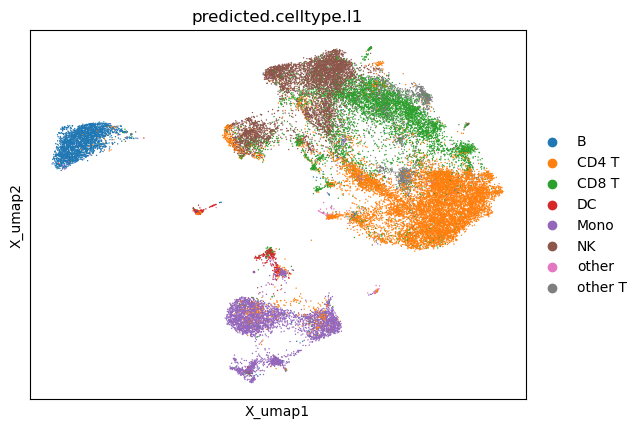

In [27]:
sc.pl.embedding(adata, basis="X_umap", color="predicted.celltype.l1")

In [28]:
trgv = ["TRGV2", "TRGV3", "TRGV4", "TRGV5", "TRGV8", "TRGV9"]
MAIT = ["TRAV1-2"]
          
iNKT = ["TRAV24", "TRBV11-1", "TRBV11-2", "TRBV11-3"]
oth = ["TRAV21", "TRAV38-2DV8", "TRAV22", "TRAV12-2",
       "TRAV19", "TRBV7-2", "TRBV12-3"]
tgenes = trgv + MAIT + iNKT + oth

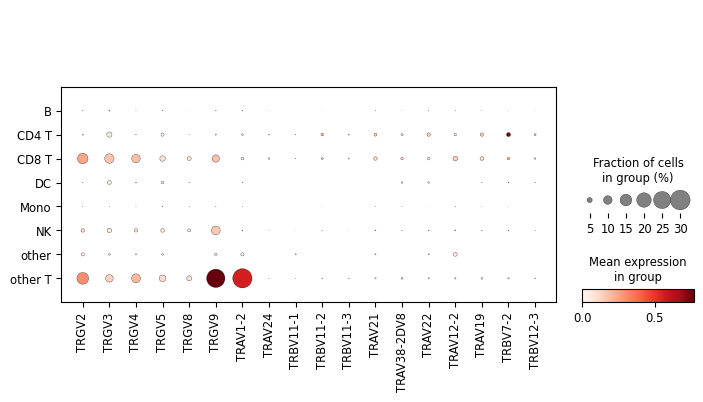

In [29]:
sc.pl.dotplot(adata, layer="soupX_counts", groupby="predicted.celltype.l1", var_names=tgenes, use_raw=False)

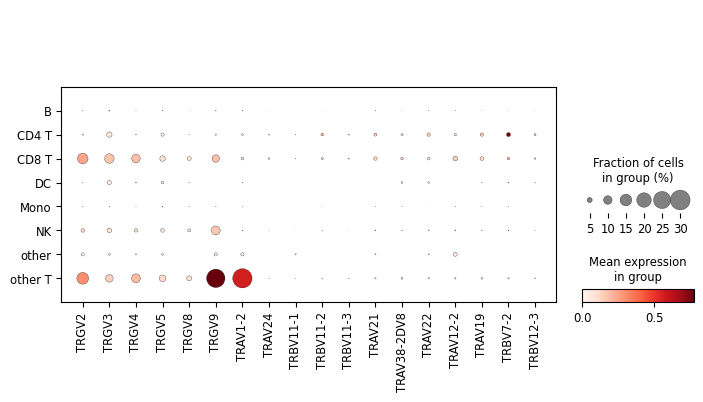

In [30]:
sc.pl.dotplot(adata, layer="counts", groupby="predicted.celltype.l1", var_names=tgenes)

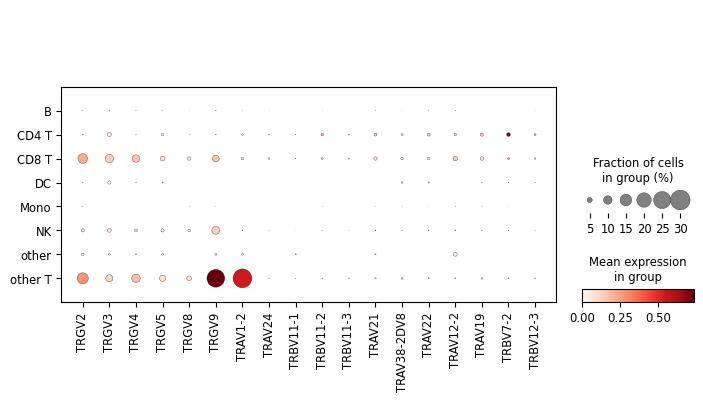

In [31]:
sc.pl.dotplot(adata, layer="soupX_counts_02", groupby="predicted.celltype.l1", var_names=tgenes)

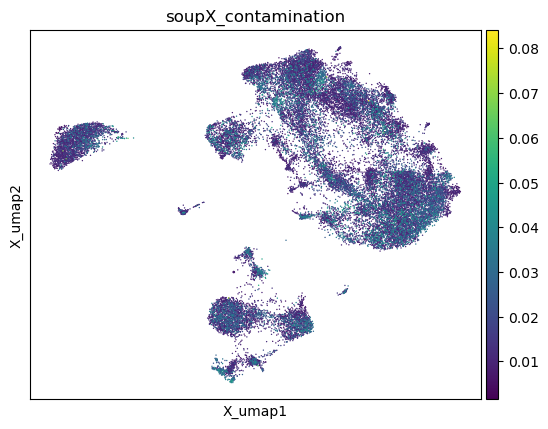

In [170]:
sc.pl.embedding(adata, layer="soupX_counts", basis="X_umap", color="soupX_contamination")

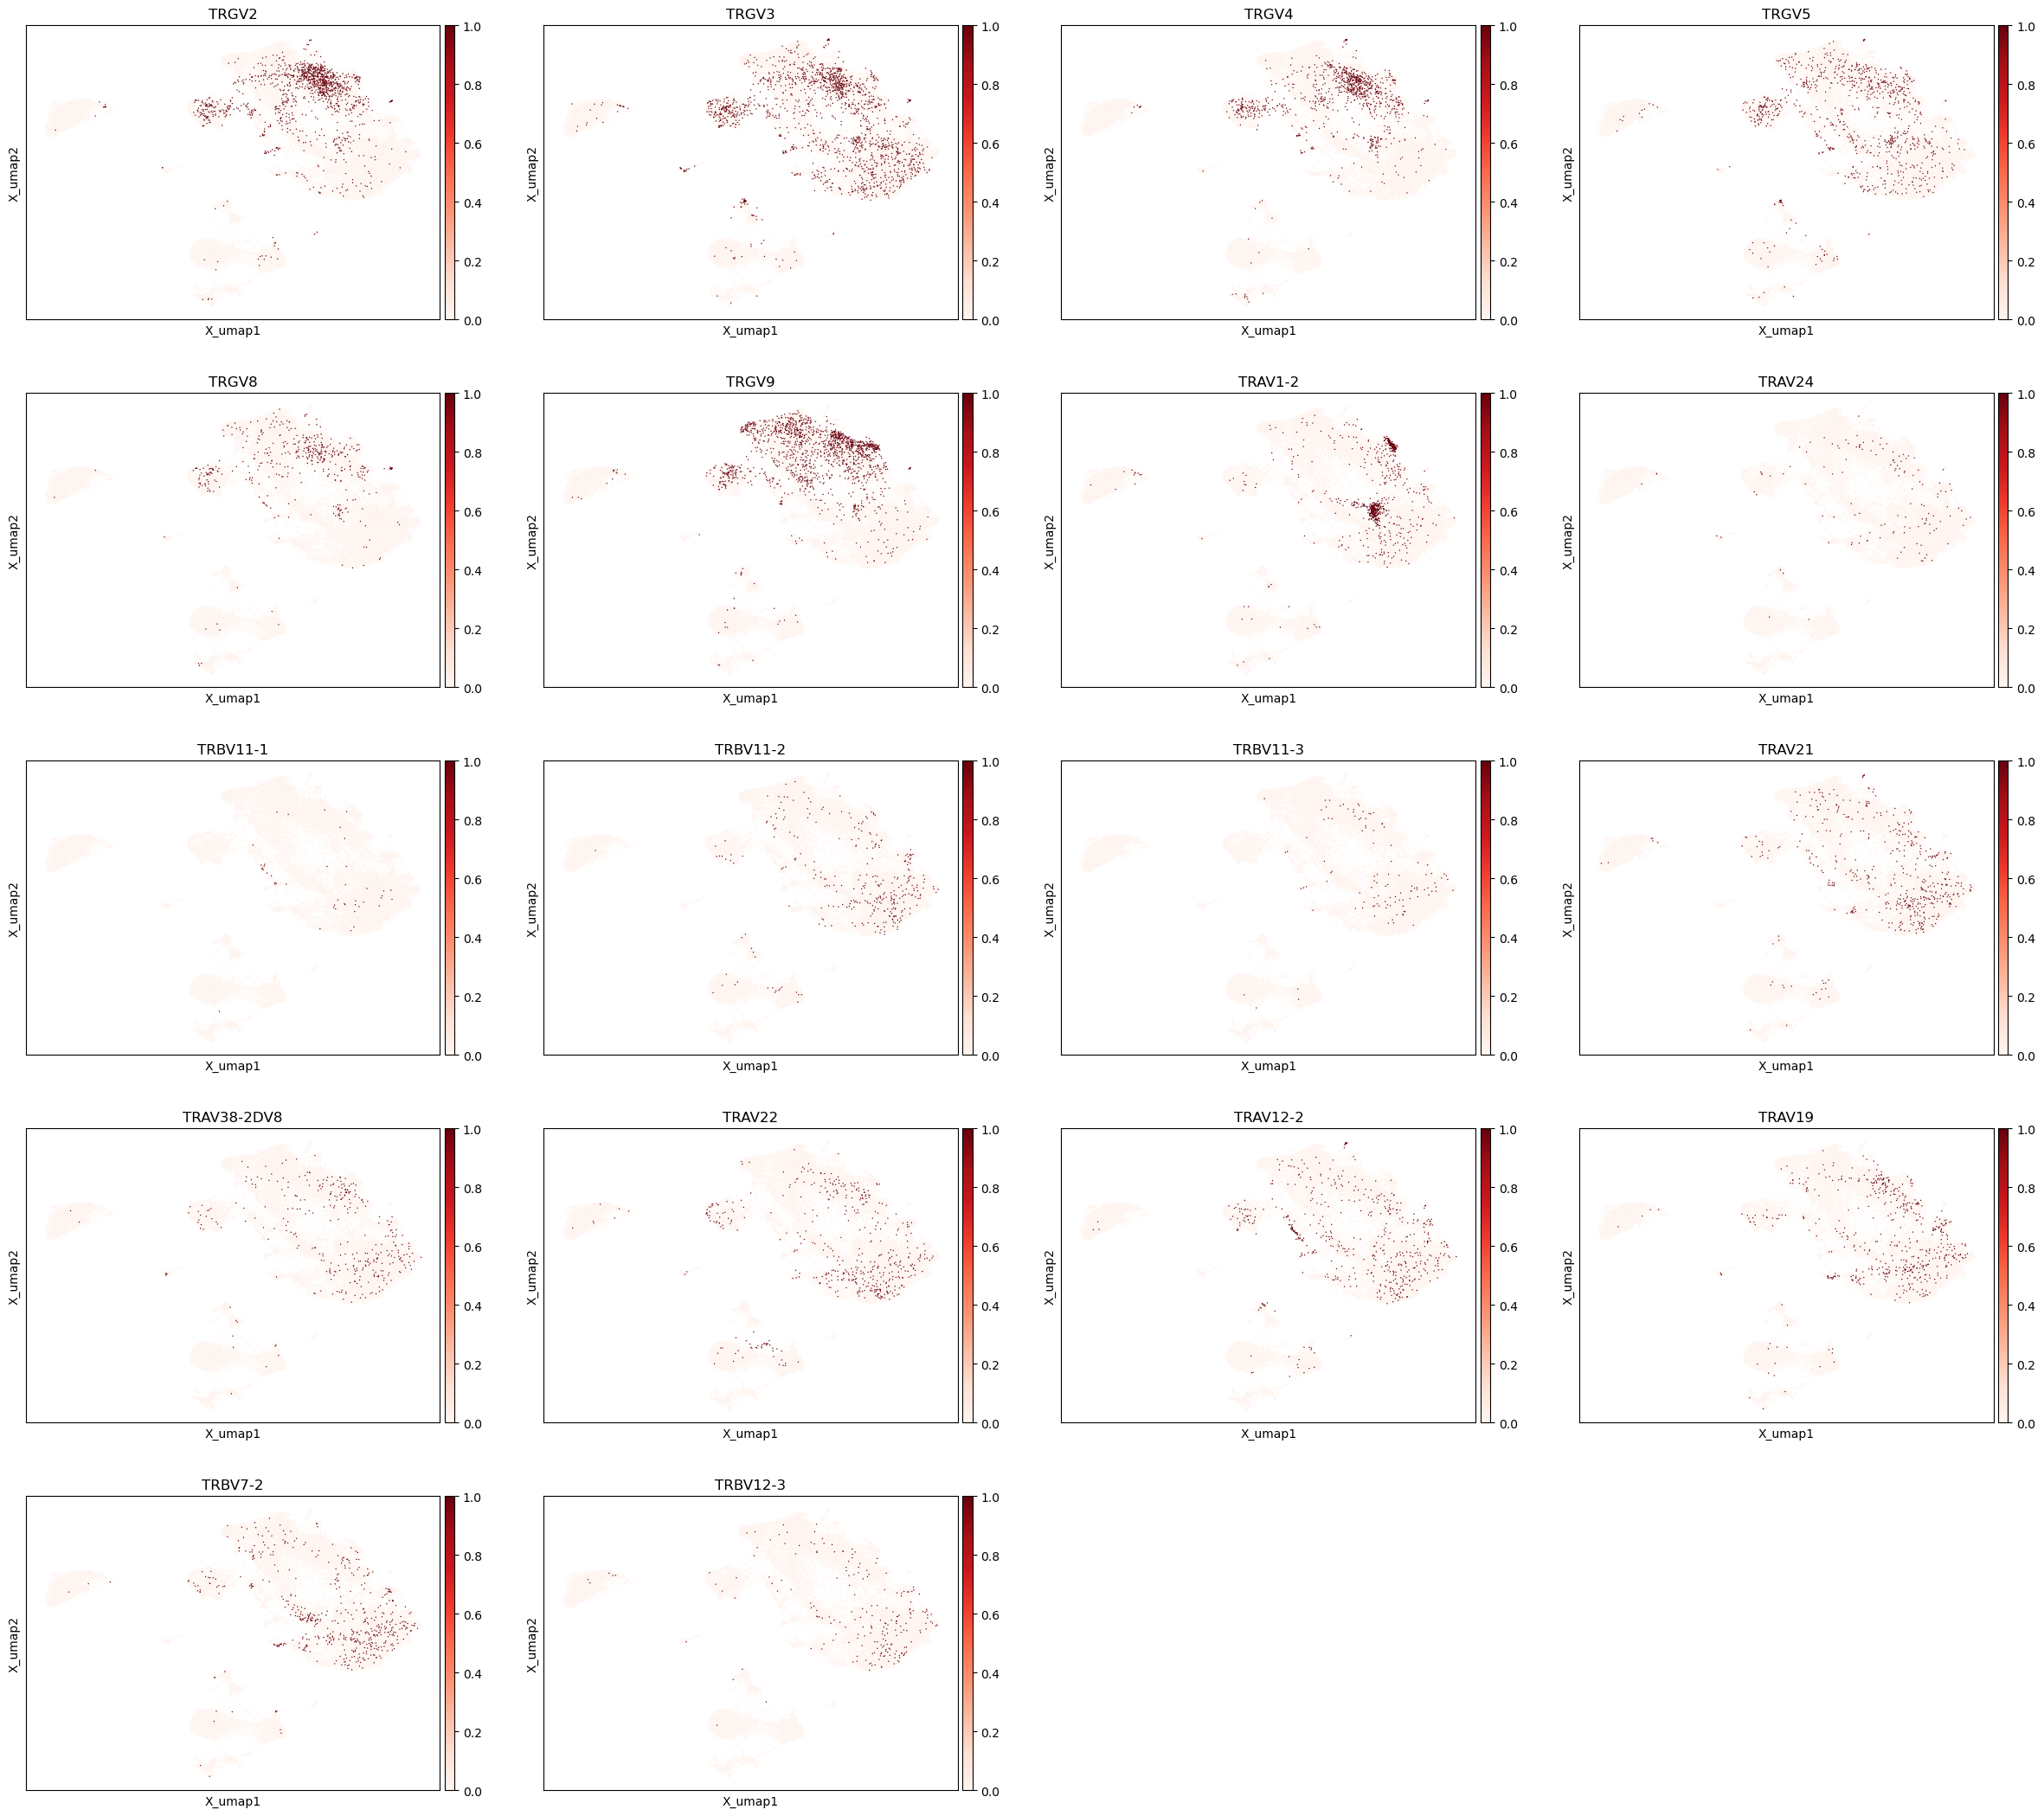

In [58]:
sc.pl.embedding(adata, layer="counts", basis="X_umap", color=tgenes, vmax=1, color_map="Reds")

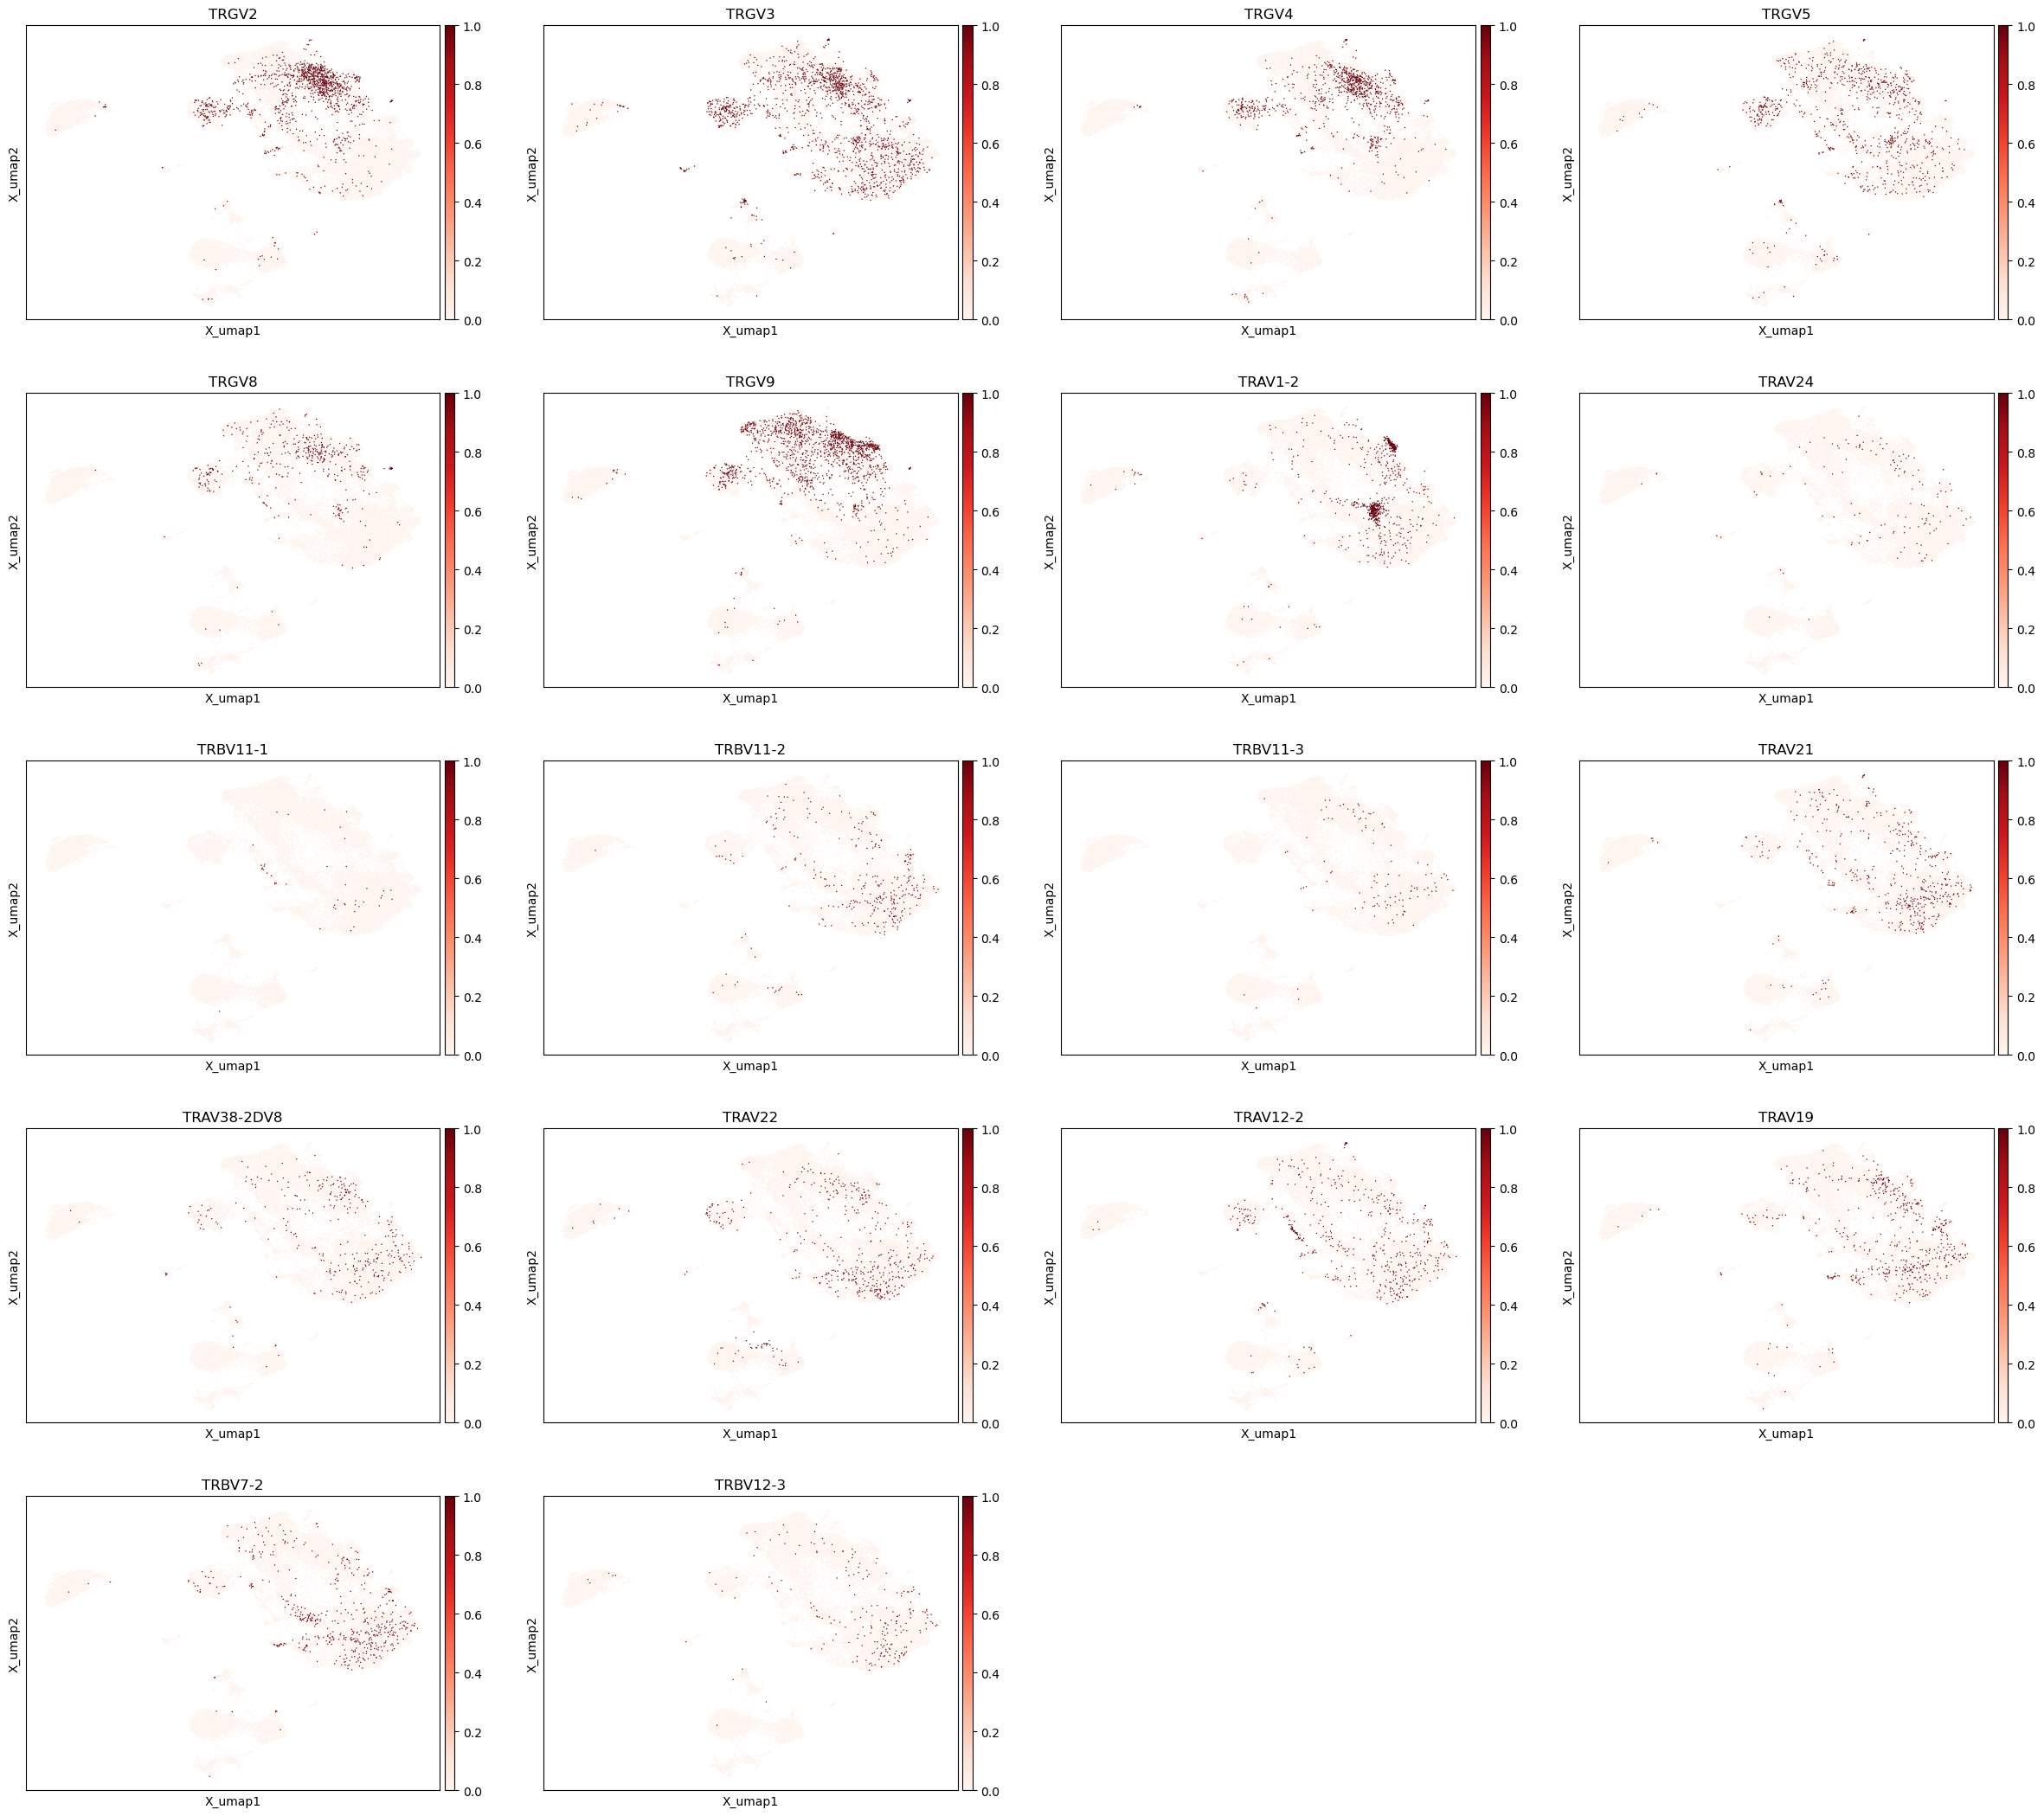

In [59]:
sc.pl.embedding(adata, layer="soupX_counts", basis="X_umap", color=tgenes, vmax=1, color_map="Reds")

In [176]:
diff_df = pd.DataFrame.sparse.from_spmatrix(adata.layers["soupX_counts"] - adata.layers["counts"])

In [197]:
diff_df

0      1      2      3      4      5      6      7      8      9      \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
29925      0      0      0      0      0      0      0      0      0      0   
29926      0      0      0      0      0      0      0      0      0      0   
29927      0      0      0      0      0      0      0      0      0      0   
29928      0      0      0      0      0      0      0      0      0      0   
29929      0      0      0      0      0      0      0      0      0      0   

       ...  36591  36592  36593  36594  36595  36596  36597  36598  36599  \
0      ...      0      0      0      0      0      0      0      0      0   
1      ...      0      0      0      0      0      0      0      0      0   
2      ...      0      0      0      0      0      0      0      0      0   
3      ...      0      0      0      0      0      0      0      0      0   
4      ...      0      0      0      0      0      0      0      0      0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
29925  ...      0      0      0      0      0      0      0      0      0   
29926  ...      0      0      0      0      0      0      0      0      0   
29927  ...      0      0      0      0      0      0      0      0      0   
29928  ...      0      0      0      0      0      0      0      0      0   
29929  ...      0      0      0      0      0      0      0      0      0   

       36600  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
29925      0  
29926      0  
29927      0  
29928      0  
29929      0  

[29930 rows x 36601 columns]

In [190]:
ind = diff_df.sum().sort_values().index

In [111]:
%%R
library(Seurat)
library(scater)
library(scDblFinder)
library(BiocParallel)

Loading required package: SeuratObject
Loading required package: sp

Attaching package: ‘SeuratObject’

The following objects are masked from ‘package:base’:

    intersect, t

Loading required package: SingleCellExperiment
Loading required package: SummarizedExperiment
Loading required package: MatrixGenerics
Loading required package: matrixStats

Attaching package: ‘MatrixGenerics’

The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts,

RInterpreterError: Failed to parse and evaluate line 'library(Seurat)\nlibrary(scater)\nlibrary(scDblFinder)\nlibrary(BiocParallel)\n'.
R error message: 'Error in library(scDblFinder) : there is no package called ‘scDblFinder’'
R stdout:
Loading required package: SeuratObject
Loading required package: sp

Attaching package: ‘SeuratObject’

The following objects are masked from ‘package:base’:

    intersect, t

Loading required package: SingleCellExperiment
Loading required package: SummarizedExperiment
Loading required package: MatrixGenerics
Loading required package: matrixStats

Attaching package: ‘MatrixGenerics’

The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, rowTabulates, rowVarDiffs, rowVars,
    rowWeightedMads, rowWeightedMeans, rowWeightedMedians,
    rowWeightedSds, rowWeightedVars

Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics

Attaching package: ‘BiocGenerics’

The following object is masked from ‘package:SeuratObject’:

    intersect

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min

Loading required package: S4Vectors

Attaching package: ‘S4Vectors’

The following objects are masked from ‘package:Matrix’:

    expand, unname

The following object is masked from ‘package:utils’:

    findMatches

The following objects are masked from ‘package:base’:

    expand.grid, I, unname

Loading required package: IRanges

Attaching package: ‘IRanges’

The following object is masked from ‘package:sp’:

    %over%

Loading required package: GenomeInfoDb
Loading required package: Biobase
Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Attaching package: ‘Biobase’

The following object is masked from ‘package:MatrixGenerics’:

    rowMedians

The following objects are masked from ‘package:matrixStats’:

    anyMissing, rowMedians


Attaching package: ‘SummarizedExperiment’

The following object is masked from ‘package:Seurat’:

    Assays

The following object is masked from ‘package:SeuratObject’:

    Assays

Loading required package: scuttle
Loading required package: ggplot2
Error in library(scDblFinder) : there is no package called ‘scDblFinder’

In [ ]:
data_mat = adata.X.T